In [47]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve

In [237]:
std_pd=pd.read_csv('./output/inference/dp1/var_at_epoch10.csv').apply(lambda x:np.sqrt(x))
mean_pd=pd.read_csv('./output/inference/dp1/mean_at_epoch10.csv')

In [238]:
std_ab=np.array(var_pd[var_pd.labels==1]['var'])
mean_ab=np.array(mean_pd[mean_pd.labels==1]['scores'])
std_n=np.array(var_pd[var_pd.labels==0]['var'])
mean_n=np.array(mean_pd[mean_pd.labels==0]['scores'])

In [239]:
scores = np.concatenate([mean_n, mean_ab])
stds = np.concatenate([std_n, std_ab])
labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])

# get score

In [240]:
def find_optimal_threshold(scores, labels):
    # https://www.researchgate.net/post/How_do_I_calculate_the_best_cutoff_for_ROC_curves
    fpr, tpr, thresholds = roc_curve(labels, scores)
    score = roc_auc_score(labels, scores)
    index = np.argmax(tpr - fpr)
    return thresholds[index], score

In [241]:
thre = find_optimal_threshold(scores, labels)

In [242]:
def marginalize(means, stds):
    output = np.zeros((means.shape[0], 100))
    for i, (mean, std) in enumerate(zip(means, stds)):
        output[i,...] = np.random.normal(mean, std, 100)
    return output

In [243]:
m_scores = marginalize(scores, stds)
m_scores = np.mean(m_scores, axis=1)
roc_auc_score(labels, m_scores)

0.9966182317980582

In [244]:
roc_auc_score(labels, scores)

0.9966404432919523

In [246]:
roc_auc_score(labels, stds)

0.9975938030092639

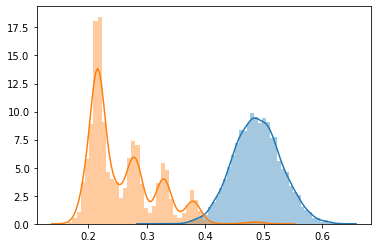

In [247]:
sns.distplot(m_scores[labels==1], label=r'Abnormal Score')
sns.distplot(m_scores[labels==0], label=r'Normal Score')

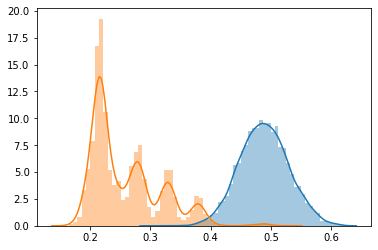

In [248]:
sns.distplot(scores[labels==1], label=r'Abnormal Score')
sns.distplot(scores[labels==0], label=r'Normal Score')

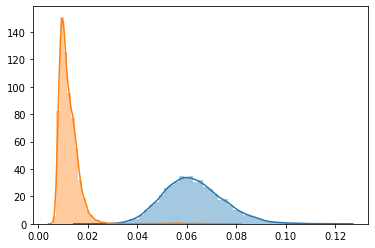

In [249]:
sns.distplot(stds[labels==1], label=r'Abnormal std')
sns.distplot(stds[labels==0], label=r'Normal std')

In [252]:
roc_auc_score(labels, stds)

0.9975938030092639